# KNN Classification

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
df = pd.read_csv('gene_expression.csv')

In [68]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

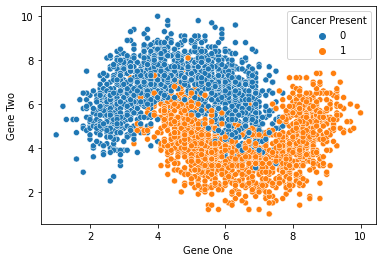

In [69]:
sns.scatterplot(data = df, x = 'Gene One', y='Gene Two', hue = 'Cancer Present')

In [70]:
len(df)

3000

(4.0, 8.0)

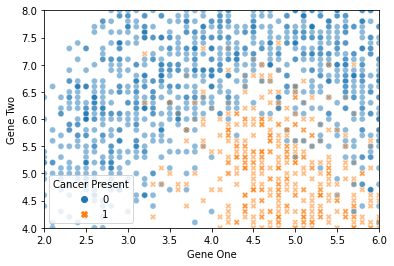

In [71]:
sns.scatterplot(data = df, x = 'Gene One', y='Gene Two', hue = 'Cancer Present', alpha=0.5, style = 'Cancer Present')

plt.xlim(2,6)
plt.ylim(4, 8)

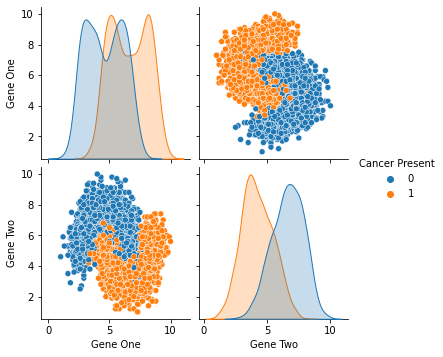

In [72]:
sns.pairplot(data = df, hue='Cancer Present')

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
X = df.drop('Cancer Present', axis = 1)

In [76]:
y = df['Cancer Present']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [78]:
scaler = StandardScaler()

In [79]:
scaled_X_train = scaler.fit_transform(X_train)

In [80]:
scaled_X_test = scaler.fit_transform(X_test)

In [81]:
from sklearn.neighbors import KNeighborsClassifier   #  help(KNeighborsClassifier)

In [82]:
knn_model = KNeighborsClassifier(n_neighbors =1)

In [83]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [84]:
y_pred = knn_model.predict(scaled_X_test)

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
confusion_matrix(y_test, y_pred)

array([[427,  43],
       [ 35, 395]], dtype=int64)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       470
           1       0.90      0.92      0.91       430

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



In [88]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

# Chossing K ()

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y_test, y_pred)

0.9133333333333333

In [91]:
1- accuracy_score(y_test, y_pred) # Finding test error

0.08666666666666667

In [92]:
test_error_rates =[]

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1- accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

In [93]:
test_error_rates

[0.08666666666666667,
 0.07999999999999996,
 0.07222222222222219,
 0.06888888888888889,
 0.06555555555555559,
 0.06888888888888889,
 0.06666666666666665,
 0.06555555555555559,
 0.06333333333333335,
 0.06777777777777783,
 0.07222222222222219,
 0.06555555555555559,
 0.07111111111111112,
 0.06555555555555559,
 0.06666666666666665,
 0.06666666666666665,
 0.06777777777777783,
 0.06555555555555559,
 0.06555555555555559,
 0.06333333333333335,
 0.06555555555555559,
 0.061111111111111116,
 0.061111111111111116,
 0.06000000000000005,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005]

Text(0.5, 0, 'K Neighbors')

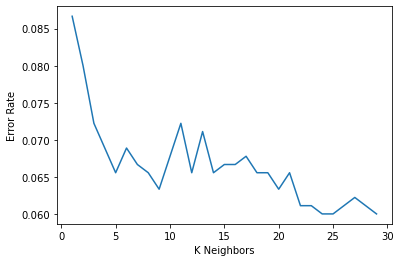

In [94]:
plt.plot(range(1, 30), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

In [95]:
# PIPLINE --. GRIDSERCH CV

In [96]:
scaler = StandardScaler()

In [97]:
knn = KNeighborsClassifier()

In [98]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [99]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [100]:
operations = [('scaler', scaler), ('knn', knn)]

In [102]:
from sklearn.pipeline import Pipeline

In [103]:
pipe = Pipeline(operations)

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
k_values = list(range(1, 20))

In [107]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [110]:
param_grid = {'knn__n_neighbors': k_values}

In [111]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv =5, scoring ='accuracy')

In [112]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [113]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [114]:
full_cv_classifier.predict(X_test)

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [115]:
full_pred = full_cv_classifier.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       470
           1       0.90      0.92      0.91       430

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



In [117]:
new_patient = [[3.8, 6.4]]

In [119]:
full_cv_classifier.predict(new_patient)

array([0], dtype=int64)

In [120]:
full_cv_classifier.predict_proba(new_patient)

array([[1., 0.]])